<h1 align=center><font size = 5>Applied Data Science Capstone Project: 
    Finding the right spot for a Vegan Lifestyle Centre in Berlin </font></h1>

# Table of contents
1. [Introduction](#introduction)
2. [Business Problem](#business_problem)
3. [Data Aquisition, Selection & Wrangling](#data)
4. [Methodology & Exploratory Data Analysis](#analysis)
5. [Predictive Modeling](#clustering)
6. [Results](#results)
7. [Conclusion/Discussion/Outlook](#conclusion)

## Introduction <a name="introduction"></a>




As part of the Applied Data Science Capstone Project, I will try to help a vegan, health awareness, ecologically-friendly entrepreneur to find the best location to set up a vegan lifestyle centre in Berlin that includes a vegan food store, an animal-free butchery, coffee shop and a first class vegan restaurant as well as a vegan clothing shop and a yoga studio in one place. To achieve this, I'll scrape Berlin's boroughs and neighborhoods from the <a href="https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins">Wikipedia Website</a>, to get it's location data to feed it into the Foursquare API to find the most common and frequent venue categories within the neighborhoods and use the k-means clustering algorithm to group the neighborhoods into clusters. 



## Business Problem <a name="business_problem"></a>

According to the independent.co.uk in 2016, "an estimated 80.000 vegan residents" (<a href="https://www.independent.co.uk/travel/news-and-advice/top-10-vegan-cities-travellers-in-world-food-turin-berlin-melbourne-tel-aviv-london-helsinki-a7707031.html">source</a>) live in Berlin. The Website HappyCow that specialized in finding vegan/vegetarian restaurants around the world with their location based service, crowned Berlin second most popular city for vegans (<a href="https://www.happycow.net/vegtopics/travel/top-vegan-friendly-cities">source</a>) with a vegan hotel, vegan bar, vegan food chain stores, animal-free butchers and more than 50 vegan restaurants (<a href="https://www.livekindly.co/berlin-vegan-capital-of-world/">source</a>). Moreover, Germany has been dominating the market for launching new vegan products between July 2017 and June 2018 with a total share of "15% of vegan introductions worldwide" (<a href="https://www.mintel.com/press-centre/food-and-drink/germany-continues-to-dominate-global-vegan-new-product-development">source</a>) and over 14% of the products labeled vegan according to 4% in 2013 (<a href="https://www.mintel.com/press-centre/food-and-drink/germany-continues-to-dominate-global-vegan-new-product-development">source</a>). If we also take into consideration that there is a growth in popularity for veganism and vegetarism worldwide (<a href="https://www.ipsos.com/sites/default/files/ct/news/documents/2018-09/an_exploration_into_diets_around_the_world.pdf">source</a>) and the potential of the vegan market and peoples' health and ecological awareness (<a href="https://www.vegansociety.com/news/media/statistics">source</a>), tourists are very interested in a place that has it all, where no further travelling from one place to another within the city is involved, especially for the people that short stay in Berlin. Since Berlin has become such a popular city for tourists with around 14 million tourists (<a href="https://en.wikipedia.org/wiki/Tourism_in_Germany">source</a>) that come visiting Berlin every year, the potential is high that they'll pay the centre a visit. 
<br><br>
Therefore, finding the right spot for opening up a vegan lifestyle centre is vitally important for our business. Since we do not want to target just the tourists, but also the locals, it means we need to focus on boroughs and particular neighborhoods that are not only close to the city centre, but easy to access for locals as well. To avoid too much competition around, we should focus on finding a location that is surrounded by a couple of hotels or accomodations with only a few vegan/vegetarian places or restaurants nearby and not too many yoga studios in that spot. We might not be interested in neighborhoods that are too lively with a lots of activities, such as drinking and entertainment opportunities, since they might not come by to pay the "calm,relaxed,health-related"-oriented centre a visit, when going out for a drink etc.


## Data Aquisition, Selection & Wrangling <a name="data"></a>
To start with, I will collect all the available data that is necessary to tackle the problem. For this project, I will need the boroughs and neighborhoods of Berlin with their longitude and latitude values as well as the Foursquare API venue data for existing vegan/vegetarian restaurants, other type of restaurants, yoga studios, hotels/hostels, bars & tourist attractions.

#### Boroughs and Neighborhoods of Berlin from Wikipedia:

1. First of all, I used the table from the <a href="https://de.wikipedia.org/wiki/Liste_der_Bezirke_und_Ortsteile_Berlins">Wikipedia Article</a> that lists all 12 boroughs and 96 neighborhoods of Berlin (<a href="https://github.com/nilbob/capstone_project/blob/master/boroughs_neighborhoods_berlin.csv">github_csv_file</a>). Since it was the second table in the article, I struggled to scrape the data from it using beautifulsoup. I also could not load the ressources for <a href="https://pypi.org/project/wikipedia/">Pypi Wikipedia</a>. Therefore, I copied the data from the article and created a csv file out of it instead. One option to overcome this challenge would have been to loop through all the tables within the article and choose the one required.
I noticed that when I imported the the data from the csv file to pandas dataframe that there has been some hidden "\n" on the Neighborhood column, which needed to be replaced with an empty string to get a proper dataframe out of it. The table looked as follow:<br><br>
<img src="https://github.com/nilbob/capstone_project/blob/master/table%20import.png?raw=true" width = 400>

In [1]:
# Importing the required libraries including Pandas, Numpy, Sklearn.Cluster, Geocoder, Folium, Matplotlib, Requests

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes 
import folium # map rendering library

# import pandas and numpy
import pandas as pd
import numpy as np

Solving environment: done


==> WARNING: A newer version of conda exists. <==
  current version: 4.5.11
  latest version: 4.7.12

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/jupyterlab/conda/envs/python

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    certifi-2019.11.28         |           py36_0         149 KB  conda-forge
    scikit-learn-0.20.1        |   py36h22eb022_0         5.7 MB
    liblapack-3.8.0            |      11_openblas          10 KB  conda-forge
    scipy-1.3.2                |   py36h921218d_0        18.0 MB  conda-forge
    geographiclib-1.50         |             py_0          34 KB  conda-forge
    libopenblas-0.3.6          |       h5a2b251_2         7.7 MB
    liblapacke-3.8.0           |      11_openblas          10 KB  conda-forge
    nu

In [2]:
#importing the neighborhoods and boroughs of Berlin from a CSV File
df_neighborhoods_berlin = pd.read_csv('boroughs_neighborhoods_berlin.csv')
#remove \n
df_neighborhoods_berlin['Neighborhood'] = df_neighborhoods_berlin['Neighborhood'].str.replace(r'\n$', '')


In [3]:
#drop unwanted column
df_neighborhoods_berlin.dtypes
df_neighborhoods_berlin.drop(columns=['Unnamed: 0'], inplace=True)
df_neighborhoods_berlin.head()

,Boroughs,Neighborhood,City,Country
0,Mitte,Mitte,Berlin,Germany
1,Mitte,Moabit,Berlin,Germany
2,Mitte,Hansaviertel,Berlin,Germany
3,Mitte,Tiergarten,Berlin,Germany
4,Mitte,Wedding,Berlin,Germany


2. Moreover, I used geocoder to collect the latitude and longitude value for Berlin to map the neighborhoods on the Berlin area. The geograpical coordinate of Berlin are 52.5170365, 13.3888599. The most important part of the table is the second column the neighborhoods. I will extend the neighborhoods by latitude and longitude values using Geocoder. To do so, I will reduce the dataframe to only having included Neighborhoods, City and Country to easier collect the longitude and latitude values for all neighborhoods at once and append them. I further checked if all neighborhoods have a latitude and longitude value or if there are any missing values.<br><br>
<img src="https://github.com/nilbob/capstone_project/blob/master/table_long_lat_berlin.png?raw=true" width = 600>

In [4]:
# Grabbing the longitude and latitude values for Berlin to create a map of Berlin and compare the values of the neighborhood later on, if they are in range
address = 'Berlin, Germany'

geolocator = Nominatim(user_agent="berlin_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Berlin are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Berlin are 52.5170365, 13.3888599.


The most important part of the table is the second column the neighborhoods. I will extend the neighborhoods by latitude and longitude values using Geocoder. To do so, I will reduce the dataframe to only having included Neighborhoods, City, Country to easier collect the longitude and latitude values for all neighborhoods at once and append them.

In [5]:
df_neighborhoods_berlin_light = df_neighborhoods_berlin[['Neighborhood','City','Country']].copy()
df_neighborhoods_berlin_light.head()

,Neighborhood,City,Country
0,Mitte,Berlin,Germany
1,Moabit,Berlin,Germany
2,Hansaviertel,Berlin,Germany
3,Tiergarten,Berlin,Germany
4,Wedding,Berlin,Germany


In [6]:
#using geocoder to collect all longitude and latitude values for the neighborhoods of Berlin
from geopy.extra.rate_limiter import RateLimiter

# 1 - conveneint function to delay between geocoding calls
geocode = RateLimiter(geolocator.geocode, min_delay_seconds=1)
# 2- - create location column
df_neighborhoods_berlin_light['Conc_'] = df_neighborhoods_berlin_light['Neighborhood'].apply(geocode)
# 3 - create longitude, laatitude and altitude from location column (returns tuple)
df_neighborhoods_berlin_light['point'] = df_neighborhoods_berlin_light['Conc_'].apply(lambda loc: tuple(loc.point) if loc else None)
# 4 - split point column into latitude, longitude and altitude columns
df_neighborhoods_berlin_light[['latitude', 'longitude', 'altitude']] = pd.DataFrame(df_neighborhoods_berlin_light['point'].tolist(), index=df_neighborhoods_berlin_light.index)


In [7]:
df_neighborhoods_berlin_light.head()

,Neighborhood,City,Country,Conc_,point,latitude,longitude,altitude
0,Mitte,Berlin,Germany,"(Mitte, Berlin, Deutschland, (52.5176896, 13.4...","(52.5176896, 13.4023757, 0.0)",52.517690,13.402376,0.0
1,Moabit,Berlin,Germany,"(Moabit, Mitte, Berlin, Deutschland, (52.53010...","(52.5301017, 13.3425422, 0.0)",52.530102,13.342542,0.0
2,Hansaviertel,Berlin,Germany,"(Hansaviertel, Mitte, Berlin, Deutschland, (52...","(52.5191234, 13.3418725, 0.0)",52.519123,13.341872,0.0
3,Tiergarten,Berlin,Germany,"(Tiergarten, Mitte, Berlin, Deutschland, (52.5...","(52.5097776, 13.3572597, 0.0)",52.509778,13.357260,0.0
4,Wedding,Berlin,Germany,"(Wedding, Mitte, Berlin, Deutschland, (52.5501...","(52.550123, 13.34197, 0.0)",52.550123,13.341970,0.0


In [12]:
#dropping the unwanted columns
df_neighborhoods_berlin_light.drop(['City', 'Country', 'Conc_','point', 'altitude'], axis=1, inplace=True)

In [13]:
#Checking for NaN Values
df_neighborhoods_berlin_light_nan = df_neighborhoods_berlin_light[df_neighborhoods_berlin_light.isna().any(axis=1)]
df_neighborhoods_berlin_light_nan.head()
#df_neighborhoods_berlin_light_nan.dropna() --> here not required

,Neighborhood,latitude,longitude


In [14]:
df_neighborhoods_berlin_light.head()

,Neighborhood,latitude,longitude
0,Mitte,52.517690,13.402376
1,Moabit,52.530102,13.342542
2,Hansaviertel,52.519123,13.341872
3,Tiergarten,52.509778,13.357260
4,Wedding,52.550123,13.341970


In [15]:
#merging the original dataframes with dataframe that includes the longitude and latitude values
df_neighborhoods_berlin_longlat = pd.merge(left=df_neighborhoods_berlin,right=df_neighborhoods_berlin_light, how='left', left_on='Neighborhood', right_on='Neighborhood')
df_neighborhoods_berlin_longlat.head()

,Boroughs,Neighborhood,City,Country,latitude,longitude
0,Mitte,Mitte,Berlin,Germany,52.517690,13.402376
1,Mitte,Moabit,Berlin,Germany,52.530102,13.342542
2,Mitte,Hansaviertel,Berlin,Germany,52.519123,13.341872
3,Mitte,Tiergarten,Berlin,Germany,52.509778,13.357260
4,Mitte,Wedding,Berlin,Germany,52.550123,13.341970


3. Then, I visualized the neighborhoods using the Folium library looking for outliers that have the wrong longitude or latitude values and are not in range for Berlin. From the map below, one can see that there have been some incorrect values for Berlin Neighborhoods placed around the world. 



In [16]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=2)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_neighborhoods_berlin_longlat['latitude'], df_neighborhoods_berlin_longlat['longitude'], df_neighborhoods_berlin_longlat['Boroughs'], df_neighborhoods_berlin_longlat['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

https://github.com/nilbob/capstone_project/blob/master/map_berlIn_wrong.png

By looking at the map, one can see that some of the neighborhoods are not within Berlin territory/range. It seems that there are other locations with the same name. For that, I will check which neighborhoods are out of range and put them in a separate dataframe and remove them from the currently working with one.

In [17]:
#dataframes of missmatched neighborhoods
missmatched_df_lichtenberg = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Lichtenberg") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Rummelsburg") | (df_neighborhoods_berlin_longlat['Neighborhood']=="Malchow") | (df_neighborhoods_berlin_longlat['Neighborhood']=="Lichtenberg") | (df_neighborhoods_berlin_longlat['Neighborhood']=="Falkenberg")
]
missmatched_df_neukoeln = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Neuköln") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Buckow")]
missmatched_df_pankow = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Pankow") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Blankenburg")]
missmatched_df_reinickendorf = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Reinickendorf") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Hermsdorf")]
missmatched_df_marzahn = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Marzahn-Hellersdorf") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Biesdorf")]
missmatched_df_treptow = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Treptow-Köpenick") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Grünau")]

df_neighborhoods_berlin_longlat_missmatched = pd.concat([missmatched_df_lichtenberg, missmatched_df_neukoeln, missmatched_df_pankow,missmatched_df_reinickendorf,missmatched_df_marzahn,missmatched_df_treptow])
df_neighborhoods_berlin_longlat_missmatched

,Boroughs,Neighborhood,City,Country,latitude,longitude
77,Lichtenberg,Lichtenberg,Berlin,Germany,48.921296,7.481227
78,Lichtenberg,Falkenberg,Berlin,Germany,49.048777,6.595821
79,Lichtenberg,Malchow,Berlin,Germany,53.477564,12.424517
84,Lichtenberg,Rummelsburg,Berlin,Germany,54.000148,16.977472
10,Pankow,Blankenburg,Berlin,Germany,51.820890,10.970734
90,Reinickendorf,Hermsdorf,Berlin,Germany,50.761263,13.631197
71,Marzahn-Hellersdorf,Biesdorf,Berlin,Germany,49.885462,6.305603
67,Treptow-Köpenick,Grünau,Berlin,Germany,-27.732656,18.378118


The reason for that is that there are some neighborhoods with the same name that exist in other locations. I put them in a separate dataframe, if needed later on, and remove the neighborhoods from the current dataframe. By checking the neighborhoods again using a different, more precise, address, i figured that all the neighborhoods that were located wrongly lay further away from the centre. See below the criteria I chose to pre-select the data. Having a closer look at the Berlin Neighborhoods map, I selected the neighborhoods of interest by zooming in on the map that meet our business objectives:



1. Neighborhoods that are near the city center
2. Neighborhoods that are centerally located
3. Neighborhoods that that have easy access to public transport
4. Neighborhoods that are so called rising stars and tourist's know of

Since most of the tourist attraction are within Berlin Mitte, we consider this to be our starting point. From here on, I would suggest that the adjacent
neighborhoods are important to discover and explore. Considering <b>Alexanderplatz Station</b> with the TV Tower & World Clock, <b>Friedrichstr. Station</b> with Museums-Insel, Stadtschloss, Dom and <b>Unter den Linden Station</b> with Reichstag and Brandenburg gate as one of the most busiest and most attractive places for tourist, which all are part of the borough Berlin Mitte, we can see on the public transport map that even regions like Moabit, Friedrichshain, Kreuzberg and Tiergarten can still be easily accessed by locals too <a href="https://sbahn.berlin/liniennetz/">S- und U-Bahn Netz</a><br>

Therefore, I came up with the following neighborhoods to be further discovered and selected for opening the vegan centre.

- Prenzlauer Berg
- Mitte
- Friedrichshain
- Kreuzberg
- Neukölln
- Schöneberg
- Moabit
- Hansaviertel
- Tiergarten
- Alt-Treptow

Famous areas to go out or spend time at, match my criteria above pretty well <a href="https://www.movinga.de/hub/expats/best-neighborhoods-in-berlin/">(Quelle)</a>


This pre-selection might have a huge impact on the outcome of my analysis/project. Therefore, it might be possible that, once I have gone through the clustering, I have to go through the whole project re-adjusting the neighborhoods. This will be part of the discussion section to go more into detail about it.  
<br>
4. After pre-selecting the neighborhoods, I'm interested in, I put them into a pandas dataframe to work with them throughout the project. Then, I used the Foursquare API to receive for each neighborhood the top venues available.
<br>

In [18]:
#drop neighborhoods that are out of range
df_neighborhoods_berlin_longlat.drop(df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Neukölln") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Buckow")].index, inplace=True)
df_neighborhoods_berlin_longlat.drop(df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Lichtenberg") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Rummelsburg") | (df_neighborhoods_berlin_longlat['Neighborhood']=="Malchow") | (df_neighborhoods_berlin_longlat['Neighborhood']=="Lichtenberg") | (df_neighborhoods_berlin_longlat['Neighborhood']=="Falkenberg")].index, inplace=True)
df_neighborhoods_berlin_longlat.drop(df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Pankow") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Blankenburg")].index, inplace=True)
df_neighborhoods_berlin_longlat.drop(df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Reinickendorf") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Hermsdorf")].index, inplace=True)
df_neighborhoods_berlin_longlat.drop(df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Marzahn-Hellersdorf") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Biesdorf")].index,inplace=True)
df_neighborhoods_berlin_longlat.drop(df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Boroughs'] == "Treptow-Köpenick") & (df_neighborhoods_berlin_longlat['Neighborhood']=="Grünau")].index,inplace=True)
df_neighborhoods_berlin_longlat.head()

,Boroughs,Neighborhood,City,Country,latitude,longitude
0,Mitte,Mitte,Berlin,Germany,52.517690,13.402376
1,Mitte,Moabit,Berlin,Germany,52.530102,13.342542
2,Mitte,Hansaviertel,Berlin,Germany,52.519123,13.341872
3,Mitte,Tiergarten,Berlin,Germany,52.509778,13.357260
4,Mitte,Wedding,Berlin,Germany,52.550123,13.341970


Another way of doing so, would be to check the longitude and latitude values of Berlin (around it up to cover all regions) and compare the numbers with the numbers within the dataframe and remove or replace the values with the new setup.

In [ ]:
#df_neighborhoods_berlin_longlat.dtype
#df_neighborhoods_berlin_longlat_missmatch = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['longitude'] >= 53) | (df_neighborhoods_berlin_longlat['latitude'] >= 13)]
#52.5170365, 13.3888599

Now, we will have a closer look at the Berlin Neighborhoods that are of interest for us by zooming in.

In [19]:
# create map of Berlin using latitude and longitude values
map_berlin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, borough, neighborhood in zip(df_neighborhoods_berlin_longlat['latitude'], df_neighborhoods_berlin_longlat['longitude'], df_neighborhoods_berlin_longlat['Boroughs'], df_neighborhoods_berlin_longlat['Neighborhood']):
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_berlin)  
    
map_berlin

https://github.com/nilbob/capstone_project/blob/master/map_berlin_right.png

In [73]:
df_neighborhoods_berlin_longlat_centre = df_neighborhoods_berlin_longlat[(df_neighborhoods_berlin_longlat['Neighborhood'] == 'Friedrichshain') | (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Kreuzberg') | (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Mitte') | (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Prenzlauer Berg')| (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Neukölln')| (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Schöneberg')| (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Moabit')| (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Hansaviertel')| (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Tiergarten')| (df_neighborhoods_berlin_longlat['Neighborhood'] == 'Alt-Treptow')]

In [74]:
df_neighborhoods_berlin_longlat_centre.reset_index().head(10)

,index,Boroughs,Neighborhood,City,Country,latitude,longitude
0,0,Mitte,Mitte,Berlin,Germany,52.517690,13.402376
1,1,Mitte,Moabit,Berlin,Germany,52.530102,13.342542
2,2,Mitte,Hansaviertel,Berlin,Germany,52.519123,13.341872
3,3,Mitte,Tiergarten,Berlin,Germany,52.509778,13.357260
4,6,Friedrichshain-Kreuzberg,Friedrichshain,Berlin,Germany,52.512215,13.450290
5,7,Friedrichshain-Kreuzberg,Kreuzberg,Berlin,Germany,52.497644,13.411914
6,8,Pankow,Prenzlauer Berg,Berlin,Germany,52.539847,13.428565
7,44,Tempelhof-Schöneberg,Schöneberg,Berlin,Germany,52.482157,13.355190
8,50,Neukölln,Neukölln,Berlin,Germany,52.481150,13.435350
9,55,Treptow-Köpenick,Alt-Treptow,Berlin,Germany,52.492563,13.459874


#### Using the Foursquare API to get the venue data:

To get an overview of the the most common venue categories in the interested neighborhoods, I will collect the top 200 venues within a 1500 meter radius to check if the categories of interest are among them (vegan/vegetarian restaurants, yoga studios, bio/organic supermarket, hotels, main attractions). The wider radius of 1500m is due to the fact that neighborhoods in Berlin can be rather big in comparison to New York's or Toronto's. 

To receive all the required data, I create a function to loop through the Foursquare URL Requests for each neighborhood. Once, I've extracted the categories out of the JSON, returned from the Foursquare API, I'll beautify the data to fit it into a pandas dataframe and check for the desired neighborhood the amount of venues that were returned. 



In [1]:
#Credentials for Foursquare API
CLIENT_ID = '' # your Foursquare ID
CLIENT_SECRET = '' # your Foursquare Secret
VERSION = '20180605'

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 
CLIENT_SECRET:


In [2]:
# top 200 venues in Berlin
LIMIT = 200 
# radius of 1500m
radius = 1500 

url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION,
    52.5170365, 
    13.3888599,
    radius, 
    LIMIT)
url # display UR

'https://api.foursquare.com/v2/venues/explore?&client_id=&client_secret=&v=20180605&ll=52.5170365,13.3888599&radius=1500&limit=200'

In [22]:
#requesting the top100/200 venues from Foursquare API
results_top100 = requests.get(url).json()
#results_top100

In [23]:
# function that extracts the category of the venue
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [26]:
venues = results_top100['response']['groups'][0]['items']
    
nearby_venues = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]

# filter the category for each row
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head()

,name,categories,lat,lng
0,Dussmann English Bookshop,Bookstore,52.518223,13.389239
1,Dussmann das KulturKaufhaus,Bookstore,52.518398,13.388788
2,Cookies Cream,Vegetarian / Vegan Restaurant,52.516569,13.388008
3,Windhorst,Cocktail Bar,52.518553,13.386270
4,Freundschaft,Wine Bar,52.518294,13.390344


##  Methodology & Exploratory Data Analysis <a name="analysis"></a>

#### Analysing the data from Foursquare API:
This allows us to find out how often a categorie eg. a vegan/vegetarian restaurant exists for each neighborhood on average. In this case for Berlin within a 1500m radius from the center. The results depicts that there are multiple cateogries among the top 100 venues and how often they exist.
<br>

I checked the amount of top venues available for each neighborhood in Berlin and narrowed it down to the neighborhoods that we were interested in. One can clearly see that the selected neighborhoods all have top100 venues within the region, while some of the more outside of Berlin neighborhoods only have around 20 to 40 venues within the radius of 1500m of its center. This could have to do with the size of the neighborhoods. The city centre is more dense and squeezed in, while the neighborhoods further away from the center are in general bigger and have fewer venues within a certain radius.
<br>

In [27]:
#numbers of venues returned by Foursquare within 1500m radius for Berlin out of the Top200
print('{} venues were returned by Foursquare.'.format(nearby_venues.shape[0]))

100 venues were returned by Foursquare.


In [28]:
#unique categories returned by Foursquare within 1500m radius for Berlin out of the Top200
nearby_venues['categories'].unique()

array(['Bookstore', 'Vegetarian / Vegan Restaurant', 'Cocktail Bar',
       'Wine Bar', 'Opera House', 'Clothing Store', 'Gourmet Shop',
       'Chocolate Shop', 'Hotel', 'Plaza', 'Cosmetics Shop',
       'Sandwich Place', 'Concert Hall', 'Exhibit', 'Sushi Restaurant',
       'Restaurant', 'Theater', 'Roof Deck', 'Historic Site',
       'Monument / Landmark', 'Drugstore', 'Church', 'History Museum',
       'Vacation Rental', 'Museum', 'Noodle House',
       'Gym / Fitness Center', 'Steakhouse', 'German Restaurant',
       'Indian Restaurant', 'Garden', 'Art Gallery', 'Art Museum',
       'Supermarket', 'Bar', 'Café', 'Scenic Lookout', 'Capitol Building',
       'Park', 'Middle Eastern Restaurant', 'Japanese Restaurant',
       'Beach Bar', 'Cycle Studio', 'Pub', 'Optical Shop',
       'Performing Arts Venue', 'Waterfront', 'Beer Store', 'Hostel',
       'Caucasian Restaurant', 'Italian Restaurant', 'Coffee Shop',
       'Rental Car Location', 'Bistro', 'Salad Place',
       'Athletics 

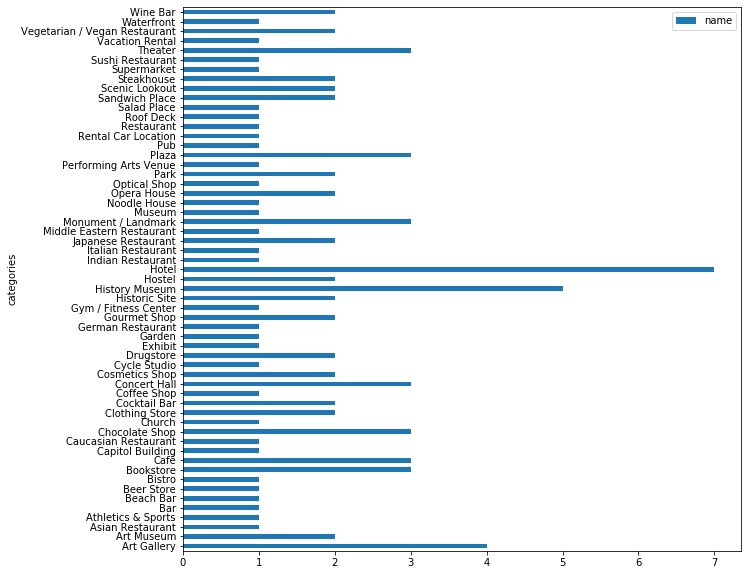

In [30]:
#plotting the categories for Berlin
df_neighborhoods_berlin_longlat_cat = nearby_venues.groupby('categories').count().reset_index()
df_neighborhoods_berlin_longlat_cat.plot.barh(x='categories',y='name', figsize=(10, 10))

In [31]:
#get top200 venues within a radius of 1500 for all neighborhood
def getNearbyVenues(names, latitudes, longitudes, radius=1500, LIMIT=200):
    
    venues_list1=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results1 = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list1.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results1])

    nearby_venues1 = pd.DataFrame([item for venue_list1 in venues_list1 for item in venue_list1])
    nearby_venues1.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues1)

In [32]:
venues1 = results_top100['response']['groups'][0]['items']
    
nearby_venues1 = json_normalize(venues) # flatten JSON

# filter columns
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues1 =nearby_venues1.loc[:, filtered_columns]

# filter the category for each row
nearby_venues1['venue.categories'] = nearby_venues1.apply(get_category_type, axis=1)

# clean columns
nearby_venues1.columns = [col.split(".")[-1] for col in nearby_venues1.columns]

nearby_venues1.head()

,name,categories,lat,lng
0,Dussmann English Bookshop,Bookstore,52.518223,13.389239
1,Dussmann das KulturKaufhaus,Bookstore,52.518398,13.388788
2,Cookies Cream,Vegetarian / Vegan Restaurant,52.516569,13.388008
3,Windhorst,Cocktail Bar,52.518553,13.386270
4,Freundschaft,Wine Bar,52.518294,13.390344


In [33]:
#getting the data from Foursquare per neighborhood
df_neighborhoods_berlin_longlat_venues = df_neighborhoods_berlin_longlat
df_neighborhoods_berlin_longlat_venues = getNearbyVenues(names=df_neighborhoods_berlin_longlat['Neighborhood'],
                                 latitudes=df_neighborhoods_berlin_longlat['latitude'],
                                  longitudes=df_neighborhoods_berlin_longlat['longitude']
                                  )

Mitte
Moabit
Hansaviertel
Tiergarten
Wedding
Gesundbrunnen
Friedrichshain
Kreuzberg
Prenzlauer Berg
Weißensee
Heinersdorf
Karow
Stadtrandsiedlung Malchow
Pankow
Blankenfelde
Buch
Französisch Buchholz
Niederschönhausen
Rosenthal
Wilhelmsruh
Charlottenburg
Wilmersdorf
Schmargendorf
Grunewald
Westend
Charlottenburg-Nord
Halensee
Spandau
Haselhorst
Siemensstadt
Staaken
Gatow
Kladow
Hakenfelde
Falkenhagener Feld
Wilhelmstadt
Steglitz
Lichterfelde
Lankwitz
Zehlendorf
Dahlem
Nikolassee
Wannsee
Schöneberg
Friedenau
Tempelhof
Mariendorf
Marienfelde
Lichtenrade
Neukölln
Britz
Rudow
Gropiusstadt
Alt-Treptow
Plänterwald
Baumschulenweg
Johannisthal
Niederschöneweide
Altglienicke
Adlershof
Bohnsdorf
Oberschöneweide
Köpenick
Friedrichshagen
Rahnsdorf
Müggelheim
Schmöckwitz
Marzahn
Kaulsdorf
Mahlsdorf
Hellersdorf
Friedrichsfelde
Karlshorst
Wartenberg
Neu-Hohenschönhausen
Alt-Hohenschönhausen
Fennpfuhl
Reinickendorf
Tegel
Konradshöhe
Heiligensee
Frohnau
Waidmannslust
Lübars
Wittenau
Märkisches Viertel


In [34]:
df_neighborhoods_berlin_longlat_venues.head()
#nearby_venues1.head(10)

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Mitte,52.51769,13.402376,Lustgarten,52.518469,13.399454,Garden
1,Mitte,52.51769,13.402376,Radisson Blu,52.519580,13.402730,Hotel
2,Mitte,52.51769,13.402376,Kuppelumgang Berliner Dom,52.518966,13.400981,Scenic Lookout
3,Mitte,52.51769,13.402376,Designpanoptikum - surreales Museum für indust...,52.516941,13.406072,Museum
4,Mitte,52.51769,13.402376,Deutsches Historisches Museum,52.517788,13.396948,History Museum


In [41]:
#numbers of venues returned by Foursquare withnearby_venuesus for Subset of Berlin out of the Top200
print('{} venues were returned by Foursquare.'.format(nearby_venues1.shape[0]))

#unique categories returned by Foursquare within 1500m radius for Subset of Berlin out of the Top200
nearby_venues1['categories'].unique()

100 venues were returned by Foursquare.


array(['Bookstore', 'Vegetarian / Vegan Restaurant', 'Cocktail Bar',
       'Wine Bar', 'Opera House', 'Clothing Store', 'Gourmet Shop',
       'Chocolate Shop', 'Hotel', 'Plaza', 'Cosmetics Shop',
       'Sandwich Place', 'Concert Hall', 'Exhibit', 'Sushi Restaurant',
       'Restaurant', 'Theater', 'Roof Deck', 'Historic Site',
       'Monument / Landmark', 'Drugstore', 'Church', 'History Museum',
       'Vacation Rental', 'Museum', 'Noodle House',
       'Gym / Fitness Center', 'Steakhouse', 'German Restaurant',
       'Indian Restaurant', 'Garden', 'Art Gallery', 'Art Museum',
       'Supermarket', 'Bar', 'Café', 'Scenic Lookout', 'Capitol Building',
       'Park', 'Middle Eastern Restaurant', 'Japanese Restaurant',
       'Beach Bar', 'Cycle Studio', 'Pub', 'Optical Shop',
       'Performing Arts Venue', 'Waterfront', 'Beer Store', 'Hostel',
       'Caucasian Restaurant', 'Italian Restaurant', 'Coffee Shop',
       'Rental Car Location', 'Bistro', 'Salad Place',
       'Athletics 

In [42]:
#total number of venues per neighborhood
df_neighborhoods_berlin_longlat_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Adlershof,38,38,38,38,38,38
Alt-Hohenschönhausen,48,48,48,48,48,48
Alt-Treptow,100,100,100,100,100,100
Altglienicke,17,17,17,17,17,17
Baumschulenweg,23,23,23,23,23,23
...,...,...,...,...,...,...
Wilhelmsruh,38,38,38,38,38,38
Wilhelmstadt,23,23,23,23,23,23
Wilmersdorf,100,100,100,100,100,100


Now, taking a subset of the data by selecting only the neighborhoods that we are interested in.

In [43]:
df_neighborhoods_berlin_longlat_centre_venues = df_neighborhoods_berlin_longlat_venues[(df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Friedrichshain') | (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Kreuzberg') | (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Mitte') | (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Prenzlauer Berg')| (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Neukölln')| (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Schöneberg')| (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Moabit')| (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Hansaviertel')| (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Tiergarten')| (df_neighborhoods_berlin_longlat_venues['Neighborhood'] == 'Alt-Treptow')]

In [44]:
df_neighborhoods_berlin_longlat_centre_venues.groupby('Neighborhood').count()

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alt-Treptow,100,100,100,100,100,100
Friedrichshain,100,100,100,100,100,100
Hansaviertel,100,100,100,100,100,100
Kreuzberg,100,100,100,100,100,100
Mitte,100,100,100,100,100,100
Moabit,100,100,100,100,100,100
Neukölln,100,100,100,100,100,100
Prenzlauer Berg,100,100,100,100,100,100
Schöneberg,100,100,100,100,100,100


<br>By checking the amount of Vegan/Vegetarian Restaurants per Neighborhood, one can see that Friedrichshain has the highest number of restaurants in this category, while Hansaviertel does not have a single Vegan Restaurant within the top100 venues. 

In [46]:
#Finding the Venue Category of interest for our subset - here Vegan Restaurants

df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Vegan'))].groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alt-Treptow,2,2,2,2,2,2
Friedrichshain,7,7,7,7,7,7
Kreuzberg,2,2,2,2,2,2
Mitte,1,1,1,1,1,1
Moabit,2,2,2,2,2,2
Neukölln,2,2,2,2,2,2
Prenzlauer Berg,1,1,1,1,1,1
Schöneberg,1,1,1,1,1,1
Tiergarten,2,2,2,2,2,2


In [36]:
#show all vegan restaurants by name, long, lat, neighborhood
df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Vegan'))]

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
97,Mitte,52.517690,13.402376,Cookies Cream,52.516569,13.388008,Vegetarian / Vegan Restaurant
134,Moabit,52.530102,13.342542,Valladares,52.533606,13.347147,Vegetarian / Vegan Restaurant
138,Moabit,52.530102,13.342542,geh Veg,52.532178,13.342044,Vegetarian / Vegan Restaurant
393,Tiergarten,52.509778,13.357260,W - Der Imbiss,52.498095,13.353152,Vegetarian / Vegan Restaurant
396,Tiergarten,52.509778,13.357260,Radieschen Bio Bistro,52.500555,13.364374,Vegetarian / Vegan Restaurant
605,Friedrichshain,52.512215,13.450290,Kiez Vegan,52.511183,13.451631,Vegetarian / Vegan Restaurant
607,Friedrichshain,52.512215,13.450290,goodies,52.511455,13.452469,Vegetarian / Vegan Restaurant
628,Friedrichshain,52.512215,13.450290,1990 Vegan Living,52.510577,13.458518,Vegetarian / Vegan Restaurant
646,Friedrichshain,52.512215,13.450290,Chay Village,52.513509,13.458474,Vegetarian / Vegan Restaurant
657,Friedrichshain,52.512215,13.450290,Emma Pea,52.507532,13.454606,Vegetarian / Vegan Restaurant


In [48]:
#number of Organic Grocery per neighborhood among top100
df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Organic Grocery'))].groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alt-Treptow,1,1,1,1,1,1
Kreuzberg,1,1,1,1,1,1
Moabit,1,1,1,1,1,1
Prenzlauer Berg,1,1,1,1,1,1
Schöneberg,1,1,1,1,1,1
Tiergarten,1,1,1,1,1,1


In [47]:
#number of Yoga Studios per neighborhood among top100
df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Yoga'))].groupby('Neighborhood').count()


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Friedrichshain,2,2,2,2,2,2
Kreuzberg,2,2,2,2,2,2
Mitte,1,1,1,1,1,1
Moabit,1,1,1,1,1,1
Neukölln,1,1,1,1,1,1


In [40]:
#number of Hotels/Hostels per neighborhood among top100
df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Hotel')) |(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Hostel'))].groupby('Neighborhood').count() 

,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Alt-Treptow,3,3,3,3,3,3
Friedrichshain,3,3,3,3,3,3
Hansaviertel,12,12,12,12,12,12
Mitte,14,14,14,14,14,14
Moabit,5,5,5,5,5,5
Tiergarten,18,18,18,18,18,18


In [49]:
#Finding the Venue Category of interest for our subset
a = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Gym'))]
b = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Bar'))]
c = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Vegan'))]
d = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Yoga'))]
e = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Hotel'))]
f = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Organic Grocery'))]
g = df_neighborhoods_berlin_longlat_centre_venues[(df_neighborhoods_berlin_longlat_centre_venues['Venue Category'].str.contains('Hostel'))]
df_neighborhoods_berlin_longlat_centre_venues_sub = pd.concat([a,c,d,e,f,g])
df_neighborhoods_berlin_longlat_centre_venues_sub.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
40,Mitte,52.517690,13.402376,Fitness First,52.513941,13.395574,Gym / Fitness Center
140,Moabit,52.530102,13.342542,FIT STAR Fitnessstudio Berlin-Moabit,52.526497,13.342084,Gym / Fitness Center
145,Moabit,52.530102,13.342542,FitX,52.526800,13.344372,Gym / Fitness Center
178,Moabit,52.530102,13.342542,myleo crossfit,52.520156,13.328091,Gym
183,Moabit,52.530102,13.342542,McFIT,52.524888,13.345623,Gym / Fitness Center


In [50]:
#Counting the number of selected Venue Categories of interest for our subset (neighborhoods preselected)
df_neighborhoods_berlin_longlat_centre_venues_cat = df_neighborhoods_berlin_longlat_centre_venues_sub.groupby('Venue Category').count().reset_index()
df_neighborhoods_berlin_longlat_centre_venues_cat.head(10)

,Venue Category,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude
0,Climbing Gym,2,2,2,2,2,2
1,Gym,2,2,2,2,2,2
2,Gym / Fitness Center,14,14,14,14,14,14
3,Hostel,6,6,6,6,6,6
4,Hotel,44,44,44,44,44,44
5,Hotel Bar,5,5,5,5,5,5
6,Organic Grocery,6,6,6,6,6,6
7,Vegetarian / Vegan Restaurant,20,20,20,20,20,20
8,Yoga Studio,7,7,7,7,7,7


Within the selected neighborhoods, these were the amount of pre-selected categories (relevant for our business) and how often they appeared. For example, there were 20 Vegan restaurants among the neighborhoods and 44 hotels.

[Text(0, 0, 'Climbing Gym'),
 Text(0, 0, 'Gym'),
 Text(0, 0, 'Gym / Fitness Center'),
 Text(0, 0, 'Hostel'),
 Text(0, 0, 'Hotel'),
 Text(0, 0, 'Hotel Bar'),
 Text(0, 0, 'Organic Grocery'),
 Text(0, 0, 'Vegetarian / Vegan Restaurant'),
 Text(0, 0, 'Yoga Studio')]

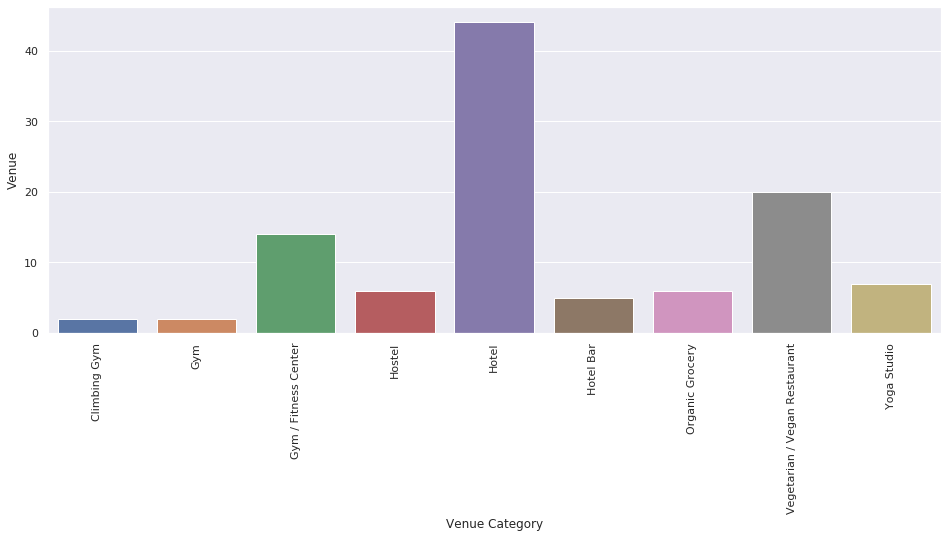

In [51]:
#draw number of apperance of venue categories of selected neighboorhoods from top100 venues per neighborhood
import seaborn as sns
import matplotlib.pyplot as plt
sns.set(style="darkgrid")
plt.figure(figsize=(16, 6))
ax = sns.barplot(x="Venue Category",y="Venue", data=df_neighborhoods_berlin_longlat_centre_venues_cat)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

In [55]:
df_neighborhoods_berlin_longlat_centre_venues_sub_grouped = df_neighborhoods_berlin_longlat_centre_venues_sub.groupby(["Neighborhood", "Venue Category"],as_index=True)["Venue Category"].count().to_frame()
df_neighborhoods_berlin_longlat_centre_venues_sub_grouped['Count'] = df_neighborhoods_berlin_longlat_centre_venues_sub.groupby(["Neighborhood", "Venue Category"],as_index=True)["Venue Category"].count().to_frame()
df_neighborhoods_berlin_longlat_centre_venues_sub_grouped.head(100)
#df_neighborhoods_berlin_longlat_centre_venues_sub_grouped.to_csv('neighborhood_venue_count_grouped.csv')

Venue Category  Count
Neighborhood    Venue Category                                      
Alt-Treptow     Gym / Fitness Center                        1      1
                Hostel                                      2      2
                Hotel                                       1      1
                Organic Grocery                             1      1
                Vegetarian / Vegan Restaurant               2      2
Friedrichshain  Climbing Gym                                1      1
                Gym / Fitness Center                        2      2
                Hostel                                      1      1
                Hotel                                       1      1
                Hotel Bar                                   1      1
                Vegetarian / Vegan Restaurant               7      7
                Yoga Studio                                 2      2
Hansaviertel    Gym                                         1      1
                Gym / Fitness Center                        2      2
                Hostel                                      1      1
                Hotel                                      10     10
                Hotel Bar                                   1      1
Kreuzberg       Gym / Fitness Center                        1      1
                Organic Grocery                             1      1
                Vegetarian / Vegan Restaurant               2      2
                Yoga Studio                                 2      2
Mitte           Gym / Fitness Center                        1      1
                Hotel                                      14     14
                Vegetarian / Vegan Restaurant               1      1
                Yoga Studio                                 1      1
Moabit          Gym                                         1      1
                Gym / Fitness Center                        3      3
                Hostel                                      2      2
                Hotel                                       3      3
                Organic Grocery                             1      1
                Vegetarian / Vegan Restaurant               2      2
                Yoga Studio                                 1      1
Neukölln        Vegetarian / Vegan Restaurant               2      2
                Yoga Studio                                 1      1
Prenzlauer Berg Organic Grocery                             1      1
                Vegetarian / Vegan Restaurant               1      1
Schöneberg      Climbing Gym                                1      1
                Gym / Fitness Center                        3      3
                Organic Grocery                             1      1
                Vegetarian / Vegan Restaurant               1      1
Tiergarten      Gym / Fitness Center                        1      1
                Hotel                                      15     15
                Hotel Bar                                   3      3
                Organic Grocery                             1      1
                Vegetarian / Vegan Restaurant               2      2

In [56]:
# Supposed to be a grouped bar chart for each neighborhood and the desired category count


To deep dive more into the analysis/data and to prepare the data for the algorithm, I will do a <b>"one hot encoding"</b> with the data. That means that I will be able to determine the most common venues (top15) within the neighborhood. Having a closer look at the table, only Friedrichshain and Alt-Treptow are the neighborhoods that have a Vegan/Vegetarian Restaurants under the top15 venues.

In [75]:
# one hot encoding
df_neighborhoods_berlin_longlat_centre_venues_onehot = pd.get_dummies(df_neighborhoods_berlin_longlat_centre_venues[['Venue Category']], prefix="", prefix_sep="")


# add neighborhood column back to dataframe
df_neighborhoods_berlin_longlat_centre_venues_onehot['Neighborhoods'] = df_neighborhoods_berlin_longlat_centre_venues['Neighborhood'] 


# move neighborhood column to the first column
fixed_columns = [df_neighborhoods_berlin_longlat_centre_venues_onehot.columns[-1]] + list(df_neighborhoods_berlin_longlat_centre_venues_onehot.columns[:-1])
df_neighborhoods_berlin_longlat_centre_venues_onehot = df_neighborhoods_berlin_longlat_centre_venues_onehot[fixed_columns]

df_neighborhoods_berlin_longlat_centre_venues_grouped = df_neighborhoods_berlin_longlat_centre_venues_onehot.groupby('Neighborhoods').mean().reset_index()
df_neighborhoods_berlin_longlat_centre_venues_grouped

,Neighborhoods,African Restaurant,American Restaurant,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Austrian Restaurant,...,Turkish Restaurant,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Waterfront,Wine Bar,Wine Shop,Winery,Yoga Studio,Zoo,Zoo Exhibit
0,Alt-Treptow,0.00,0.00,0.00,0.01,0.00,0.00,0.00,0.01,0.00,...,0.00,0.02,0.02,0.01,0.00,0.01,0.00,0.00,0.00,0.00
1,Friedrichshain,0.01,0.00,0.00,0.01,0.00,0.00,0.01,0.00,0.00,...,0.00,0.07,0.01,0.00,0.00,0.01,0.00,0.02,0.00,0.00
2,Hansaviertel,0.00,0.00,0.01,0.00,0.04,0.00,0.01,0.00,0.00,...,0.01,0.00,0.03,0.02,0.00,0.00,0.00,0.00,0.01,0.11
3,Kreuzberg,0.01,0.00,0.00,0.03,0.00,0.01,0.00,0.00,0.00,...,0.03,0.02,0.00,0.01,0.03,0.00,0.00,0.02,0.00,0.00
4,Mitte,0.00,0.00,0.00,0.03,0.02,0.00,0.00,0.00,0.00,...,0.00,0.01,0.01,0.00,0.01,0.01,0.00,0.01,0.00,0.00
5,Moabit,0.00,0.00,0.00,0.01,0.01,0.00,0.00,0.00,0.01,...,0.04,0.02,0.04,0.01,0.00,0.00,0.00,0.01,0.00,0.00
6,Neukölln,0.02,0.00,0.00,0.01,0.00,0.00,0.00,0.00,0.00,...,0.02,0.02,0.01,0.00,0.01,0.02,0.00,0.01,0.00,0.00
7,Prenzlauer Berg,0.00,0.01,0.00,0.00,0.00,0.01,0.02,0.00,0.02,...,0.00,0.01,0.06,0.00,0.02,0.00,0.01,0.00,0.00,0.00
8,Schöneberg,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.02,0.01,0.03,0.00,0.02,0.00,0.00,0.00,0.00,0.00
9,Tiergarten,0.00,0.00,0.01,0.04,0.04,0.00,0.00,0.00,0.00,...,0.00,0.02,0.01,0.00,0.00,0.00,0.00,0.00,0.01,0.03


In [58]:
# for a second run of k-means backing up the dataframe
df_neighborhoods_berlin_longlat_centre_venues_grouped_another = df_neighborhoods_berlin_longlat_centre_venues_grouped

In [59]:
#for category extraction
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [61]:
# getting the most common venues per neighborhood with associated venue category
import numpy as np
num_top_venues = 15

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhoods']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = df_neighborhoods_berlin_longlat_centre_venues_grouped['Neighborhoods']

for ind in np.arange(df_neighborhoods_berlin_longlat_centre_venues_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(df_neighborhoods_berlin_longlat_centre_venues_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Alt-Treptow,Café,Nightclub,Bar,Park,Rock Club,Coffee Shop,Ice Cream Shop,Pizza Place,Bakery,Beer Garden,Indian Restaurant,Hostel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Pub
1,Friedrichshain,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,Record Shop,Falafel Restaurant,Middle Eastern Restaurant,German Restaurant,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Bookstore
2,Hansaviertel,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,Italian Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Indian Restaurant,Restaurant,Bar,Bakery,Waterfront
3,Kreuzberg,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,Turkish Restaurant,Cocktail Bar,Ice Cream Shop,Sushi Restaurant,Music Store,Indie Movie Theater,Gourmet Shop,Yoga Studio
4,Mitte,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,Concert Hall,Bookstore,Restaurant,Chocolate Shop,Dance Studio,Park,Art Museum,Monument / Landmark
5,Moabit,Café,Bar,Vietnamese Restaurant,Turkish Restaurant,Italian Restaurant,Hotel,Cocktail Bar,Park,Coffee Shop,Indian Restaurant,Restaurant,Gym / Fitness Center,Trattoria/Osteria,Pastry Shop,Drugstore
6,Neukölln,Bar,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,Indie Movie Theater,Pizza Place,Bakery,Beer Bar,Bistro,Breakfast Spot,Dive Bar,Food & Drink Shop,German Restaurant,Middle Eastern Restaurant
7,Prenzlauer Berg,Café,Vietnamese Restaurant,Cocktail Bar,Ice Cream Shop,Bar,Breakfast Spot,Beer Bar,Bakery,Falafel Restaurant,Park,Japanese Restaurant,Chinese Restaurant,Korean Restaurant,Coffee Shop,Italian Restaurant
8,Schöneberg,Café,Pizza Place,Bakery,Bistro,Vietnamese Restaurant,Gym / Fitness Center,Cocktail Bar,French Restaurant,Indie Movie Theater,Doner Restaurant,Park,Korean Restaurant,Italian Restaurant,Ice Cream Shop,Grocery Store
9,Tiergarten,Hotel,Art Gallery,Art Museum,Concert Hall,Italian Restaurant,Zoo Exhibit,Hotel Bar,Plaza,Restaurant,Bar,Café,Cocktail Bar,Modern European Restaurant,Monument / Landmark,Park


In [69]:
#show only rows where Vegan appeared in one of the columns
neighborhoods_venues_sorted[(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Vegan' in L).any(axis=1))]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Alt-Treptow,Café,Nightclub,Bar,Park,Rock Club,Coffee Shop,Ice Cream Shop,Pizza Place,Bakery,Beer Garden,Indian Restaurant,Hostel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Pub
1,Friedrichshain,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,Record Shop,Falafel Restaurant,Middle Eastern Restaurant,German Restaurant,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Bookstore


In [70]:
#show only rows where Yoga appeared in one of the columns
neighborhoods_venues_sorted[(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Yoga' in L).any(axis=1))]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
3,Kreuzberg,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,Turkish Restaurant,Cocktail Bar,Ice Cream Shop,Sushi Restaurant,Music Store,Indie Movie Theater,Gourmet Shop,Yoga Studio


In [62]:
#show only rows where Organic Grocery appeared in one of the columns
neighborhoods_venues_sorted[(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Organic Grocery' in L).any(axis=1))]

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue


In [63]:
#finding the rows that have Vegan, Hotel, Hostel, Organic Grocery, Gym in one of the Venue Category Columns 
neighborhoods_venues_sorted[(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Vegan' in L).any(axis=1)) |(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Hotel' in L).any(axis=1))|(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Gym' in L).any(axis=1))|(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Yoga' in L).any(axis=1))|(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Organic Grocery' in L).any(axis=1))|(neighborhoods_venues_sorted.filter(like='Venue').applymap(lambda L: 'Hostel' in L).any(axis=1))]


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue
0,Alt-Treptow,Café,Nightclub,Bar,Park,Rock Club,Coffee Shop,Ice Cream Shop,Pizza Place,Bakery,Beer Garden,Indian Restaurant,Hostel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Pub
1,Friedrichshain,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,Record Shop,Falafel Restaurant,Middle Eastern Restaurant,German Restaurant,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Bookstore
2,Hansaviertel,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,Italian Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Indian Restaurant,Restaurant,Bar,Bakery,Waterfront
3,Kreuzberg,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,Turkish Restaurant,Cocktail Bar,Ice Cream Shop,Sushi Restaurant,Music Store,Indie Movie Theater,Gourmet Shop,Yoga Studio
4,Mitte,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,Concert Hall,Bookstore,Restaurant,Chocolate Shop,Dance Studio,Park,Art Museum,Monument / Landmark
5,Moabit,Café,Bar,Vietnamese Restaurant,Turkish Restaurant,Italian Restaurant,Hotel,Cocktail Bar,Park,Coffee Shop,Indian Restaurant,Restaurant,Gym / Fitness Center,Trattoria/Osteria,Pastry Shop,Drugstore
8,Schöneberg,Café,Pizza Place,Bakery,Bistro,Vietnamese Restaurant,Gym / Fitness Center,Cocktail Bar,French Restaurant,Indie Movie Theater,Doner Restaurant,Park,Korean Restaurant,Italian Restaurant,Ice Cream Shop,Grocery Store
9,Tiergarten,Hotel,Art Gallery,Art Museum,Concert Hall,Italian Restaurant,Zoo Exhibit,Hotel Bar,Plaza,Restaurant,Bar,Café,Cocktail Bar,Modern European Restaurant,Monument / Landmark,Park


In [65]:
#Concatination strings for each column on a row joining them by komma to later count number of appearences 
neighborhoods_venues_sorted['Venues_Con'] = neighborhoods_venues_sorted[['1st Most Common Venue', '2nd Most Common Venue', '3rd Most Common Venue', '4th Most Common Venue','5th Most Common Venue', '6th Most Common Venue', '7th Most Common Venue', '8th Most Common Venue','9th Most Common Venue', '10th Most Common Venue', '11th Most Common Venue', '12th Most Common Venue', '13th Most Common Venue', '14th Most Common Venue', '15th Most Common Venue']].apply(lambda x: ', '.join(x), axis=1)
neighborhoods_venues_sorted.head()



,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue,11th Most Common Venue,12th Most Common Venue,13th Most Common Venue,14th Most Common Venue,15th Most Common Venue,Venues_Con
0,Alt-Treptow,Café,Nightclub,Bar,Park,Rock Club,Coffee Shop,Ice Cream Shop,Pizza Place,Bakery,Beer Garden,Indian Restaurant,Hostel,Vegetarian / Vegan Restaurant,Vietnamese Restaurant,Pub,"Café, Nightclub, Bar, Park, Rock Club, Coffee ..."
1,Friedrichshain,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,Record Shop,Falafel Restaurant,Middle Eastern Restaurant,German Restaurant,Italian Restaurant,Cocktail Bar,Gym / Fitness Center,Bookstore,"Café, Vegetarian / Vegan Restaurant, Coffee Sh..."
2,Hansaviertel,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,Italian Restaurant,Vietnamese Restaurant,Gym / Fitness Center,Indian Restaurant,Restaurant,Bar,Bakery,Waterfront,"Zoo Exhibit, Hotel, Art Museum, Café, Beer Gar..."
3,Kreuzberg,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,Turkish Restaurant,Cocktail Bar,Ice Cream Shop,Sushi Restaurant,Music Store,Indie Movie Theater,Gourmet Shop,Yoga Studio,"Coffee Shop, Bar, Café, German Restaurant, Art..."
4,Mitte,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,Concert Hall,Bookstore,Restaurant,Chocolate Shop,Dance Studio,Park,Art Museum,Monument / Landmark,"Hotel, History Museum, Coffee Shop, Café, Plaz..."


In [70]:
neighborhoods_venues_sorted_countvalue = neighborhoods_venues_sorted
substring ="Bar"
substring1 ="Restaurant"
substring2 ="Café"
substring3 ="Pub"
substring4 ="Nightclub"
substring5 ="Vegetarian / Vegan Restaurant"


neighborhoods_venues_sorted_countvalue['Venues_Bar'] = neighborhoods_venues_sorted_countvalue['Venues_Con'].str.count(substring)
neighborhoods_venues_sorted_countvalue['Venues_Restaurant'] = neighborhoods_venues_sorted_countvalue['Venues_Con'].str.count(substring1)
neighborhoods_venues_sorted_countvalue['Venues_Cafe'] = neighborhoods_venues_sorted_countvalue['Venues_Con'].str.count(substring2)
neighborhoods_venues_sorted_countvalue['Venues_Pub'] = neighborhoods_venues_sorted_countvalue['Venues_Con'].str.count(substring3)
neighborhoods_venues_sorted_countvalue['Venues_Nightclub'] = neighborhoods_venues_sorted_countvalue['Venues_Con'].str.count(substring4)
neighborhoods_venues_sorted_countvalue['Venues_Vegan_Rest'] = neighborhoods_venues_sorted_countvalue['Venues_Con'].str.count(substring5)

neighborhoods_venues_sorted_countvalue.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venues_Con_Restaurant,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub
0,Alt-Treptow,Café,Nightclub,Bar,Park,Rock Club,Coffee Shop,Ice Cream Shop,Pizza Place,Bakery,...,3,1,1,1,1,1,3,1,1,1
1,Friedrichshain,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,Record Shop,Falafel Restaurant,...,6,1,0,1,1,2,6,1,0,1
2,Hansaviertel,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,Italian Restaurant,Vietnamese Restaurant,...,4,1,0,0,0,1,4,1,0,0
3,Kreuzberg,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,Turkish Restaurant,Cocktail Bar,...,3,1,0,0,0,3,3,1,0,0
4,Mitte,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,Concert Hall,Bookstore,...,1,1,0,0,0,0,1,1,0,0


In [71]:
#count venues after grouping them
neighborhoods_venues_sorted['Sum Venues GoingOut'] = neighborhoods_venues_sorted[['Neighborhoods','Venues_Bar','Venues_Restaurant','Venues_Cafe','Venues_Pub','Venues_Nightclub']].sum(axis=1)
neighborhoods_venues_sorted[['Neighborhoods','Venues_Bar','Venues_Restaurant','Venues_Cafe','Venues_Pub','Venues_Nightclub','Venues_Vegan_Rest','Sum Venues GoingOut']]

,Neighborhoods,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Venues_Vegan_Rest,Sum Venues GoingOut
0,Alt-Treptow,1,3,1,1,1,1,7
1,Friedrichshain,2,6,1,0,1,1,10
2,Hansaviertel,1,4,1,0,0,0,6
3,Kreuzberg,3,3,1,0,0,0,7
4,Mitte,0,1,1,0,0,0,2
5,Moabit,2,5,1,0,0,0,8
6,Neukölln,4,3,1,0,0,0,8
7,Prenzlauer Berg,3,6,1,0,0,0,10
8,Schöneberg,1,5,1,0,0,0,7
9,Tiergarten,3,3,1,0,0,0,7


##  Predictive Modeling <a name="clustering"></a>  
#### Cluster the neighborhoods using k-means partioning clustering algorithm





 
 


Finding neighborhoods with similar characteristics based on the venue data from the Foursquare API and clustering them, can be of importance for our business decision, where to set up the vegan centre. This information can be used to focus more on our targeted audience and where they can be found. I
For that, I used the unsupervised learning algorithm k-means for clustering the neighborhoods, because it is one of the most popular and commonly used algorithm for partitioning the neighborhoods. It clusters the neighborhoods into groups that share the mostly frequent used venues of interest. This can be of interest when looking for little or no competition in a neighborhood or places of interest nearby that help aquire new customers.
The positive aspect of the algorithm is that objects that are within a cluster a very lookalike while the objects in other clusters are very different. So, once found a cluster that suits best, it's very likely that it is not interfering with another one, where it might harm our business. 







I start running k-means to cluster the neighborhoods into <b>3 clusters</b>. With the most frequent categories at hand, I will be able to categorize the cluster into meaningful segments to look for the best place that covers most of the categories that match our criterias for preventing too much competition and to set up the business.

In [79]:
# set number of clusters to 3
kclusters = 3

df_neighborhoods_berlin_longlat_centre_venues_grouped_clustering = df_neighborhoods_berlin_longlat_centre_venues_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(df_neighborhoods_berlin_longlat_centre_venues_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
#neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

df_neighborhoods_berlin_longlat_centre_venues_merged = df_neighborhoods_berlin_longlat_centre

# merge berlin_grouped with berlin_data to add latitude/longitude for each neighborhood
df_neighborhoods_berlin_longlat_centre_venues_merged = df_neighborhoods_berlin_longlat_centre_venues_merged.join(neighborhoods_venues_sorted.set_index('Neighborhoods'), on='Neighborhood')

df_neighborhoods_berlin_longlat_centre_venues_merged.head(50) # check the last columns!


,Boroughs,Neighborhood,City,Country,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Sum Venues GoingOut
0,Mitte,Mitte,Berlin,Germany,52.517690,13.402376,1,Hotel,History Museum,Coffee Shop,...,1,0,0,0,0,1,1,0,0,2
1,Mitte,Moabit,Berlin,Germany,52.530102,13.342542,0,Café,Bar,Vietnamese Restaurant,...,1,0,0,0,2,5,1,0,0,8
2,Mitte,Hansaviertel,Berlin,Germany,52.519123,13.341872,1,Zoo Exhibit,Hotel,Art Museum,...,1,0,0,0,1,4,1,0,0,6
3,Mitte,Tiergarten,Berlin,Germany,52.509778,13.357260,1,Hotel,Art Gallery,Art Museum,...,1,0,0,0,3,3,1,0,0,7
6,Friedrichshain-Kreuzberg,Friedrichshain,Berlin,Germany,52.512215,13.450290,0,Café,Vegetarian / Vegan Restaurant,Coffee Shop,...,1,0,1,1,2,6,1,0,1,10
7,Friedrichshain-Kreuzberg,Kreuzberg,Berlin,Germany,52.497644,13.411914,2,Coffee Shop,Bar,Café,...,1,0,0,0,3,3,1,0,0,7
8,Pankow,Prenzlauer Berg,Berlin,Germany,52.539847,13.428565,0,Café,Vietnamese Restaurant,Cocktail Bar,...,1,0,0,0,3,6,1,0,0,10
44,Tempelhof-Schöneberg,Schöneberg,Berlin,Germany,52.482157,13.355190,0,Café,Pizza Place,Bakery,...,1,0,0,0,1,5,1,0,0,7
50,Neukölln,Neukölln,Berlin,Germany,52.481150,13.435350,2,Bar,Coffee Shop,Café,...,1,0,0,0,4,3,1,0,0,8
55,Treptow-Köpenick,Alt-Treptow,Berlin,Germany,52.492563,13.459874,0,Café,Nightclub,Bar,...,1,1,1,1,1,3,1,1,1,7


Visiualizing the Data

In [80]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_neighborhoods_berlin_longlat_centre_venues_merged['latitude'], df_neighborhoods_berlin_longlat_centre_venues_merged['longitude'], df_neighborhoods_berlin_longlat_centre_venues_merged['Neighborhood'], df_neighborhoods_berlin_longlat_centre_venues_merged['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=8,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="https://github.com/nilbob/capstone_project/blob/master/k3_map.png?raw=true" width=1000>

In [81]:
#keeping the first neighborhoods and grouping data by cluster
new_df = df_neighborhoods_berlin_longlat_centre_venues_merged.set_index('Cluster Labels')
#df_neighborhoods_berlin_longlat_centre_venues_merged.groupby('Cluster Labels').mean()
new_df.drop(columns=['latitude','longitude','Boroughs'],inplace=True)
new_df.drop_duplicates(keep="first")


,Neighborhood,City,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,...,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Sum Venues GoingOut
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
1,Mitte,Berlin,Germany,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,...,1,0,0,0,0,1,1,0,0,2
0,Moabit,Berlin,Germany,Café,Bar,Vietnamese Restaurant,Turkish Restaurant,Italian Restaurant,Hotel,Cocktail Bar,...,1,0,0,0,2,5,1,0,0,8
1,Hansaviertel,Berlin,Germany,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,...,1,0,0,0,1,4,1,0,0,6
1,Tiergarten,Berlin,Germany,Hotel,Art Gallery,Art Museum,Concert Hall,Italian Restaurant,Zoo Exhibit,Hotel Bar,...,1,0,0,0,3,3,1,0,0,7
0,Friedrichshain,Berlin,Germany,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,...,1,0,1,1,2,6,1,0,1,10
2,Kreuzberg,Berlin,Germany,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,...,1,0,0,0,3,3,1,0,0,7
0,Prenzlauer Berg,Berlin,Germany,Café,Vietnamese Restaurant,Cocktail Bar,Ice Cream Shop,Bar,Breakfast Spot,Beer Bar,...,1,0,0,0,3,6,1,0,0,10
0,Schöneberg,Berlin,Germany,Café,Pizza Place,Bakery,Bistro,Vietnamese Restaurant,Gym / Fitness Center,Cocktail Bar,...,1,0,0,0,1,5,1,0,0,7
2,Neukölln,Berlin,Germany,Bar,Coffee Shop,Café,Cocktail Bar,Italian Restaurant,Indie Movie Theater,Pizza Place,...,1,0,0,0,4,3,1,0,0,8


In [82]:
#getting the mean per group for all preselected neighborhoods for each cluster label
newnew = new_df.drop(['Neighborhood'], axis=1).reset_index()
newnew[['Cluster Labels','Sum Venues GoingOut','Venues_Con_Restaurant','Venues_Vegan_Rest']].groupby('Cluster Labels').mean()

,Sum Venues GoingOut,Venues_Con_Restaurant,Venues_Vegan_Rest
Cluster Labels,,,
0,8.4,5.000000,0.4
1,5.0,2.666667,0.0
2,7.5,3.000000,0.0


<h3>Findings for k=3</h3>
By looking at the map and the table, one can see the following:<br>
Cluster 0: High amount of GoingOut Venues (high number of Restaurants, Cafe, Bar, Nightclub and Vegan Restaurants among the top15 venues)<br>
Cluster 1: Fair amount of GoingOut Venues (Lowest number for GoingOut Venues including the lowest number for Restaurants and zero Vegan restaurants among the top15)<br>
Cluster 2: Medium amount of GoingOut Venues (high number for GoingOut Venues, but far less restaurants on average and zero Vegan restaurants among the top15)<br><br>
In this case, Cluster 1 (the purple bubbles) is probably the best choice, since competition is lower for vegan restaurants and the amount of restaurants is the smallest. But let's find out if k=3 is the optimum or if a smaller or higher number of clusters is more suitable.

In [84]:
#finding the rows that have Vegan, Hotel, Hostel, Organic Grocery, in one of the Venue Category Columns 
#new_df_without = new_df.drop(['Venues_Con'], axis=1)
#new_df_without[(new_df_without.filter(like='Venue').applymap(lambda L: 'Vegan' in L).any(axis=1)) |(new_df_without.filter(like='Venue').applymap(lambda L: 'Hotel' in L).any(axis=1))|(new_df_without.filter(like='Venue').applymap(lambda L: 'Yoga' in L).any(axis=1))|(new_df_without.filter(like='Venue').applymap(lambda L: 'Organic Grocery' in L).any(axis=1))|(new_df_without.filter(like='Venue').applymap(lambda L: 'Hostel' in L).any(axis=1))]


In [141]:
#new_df_without[['Cluster Labels','Neighborhood']].reset_index().groupby(['Cluster Labels']).count().head()

In [ ]:
# Cluster Naming finding
# Count Values within Cluster for each category including

#new_df_melted = new_df.melt().reset_index().head()
#new_df_melted.head()
#new_df[(new_df.filter(like='Venue').applymap(lambda L: 'Vegan' in L).any(axis=1))
#new_filtered_df = pd.crosstab(index=new_df_melted['index'], columns=new_df_melted['value'])
#new_filtered_df.head()
#new_filtered_df.apply(pd.value_counts)

#### Elbow Method to determine the optimal k

Determining the best number of k in the k-Means clustering algorithm is one of the key aspect of how successfully the outcome of the algorithm will be. Therefore, it is important to find the best k in order to generate the optimum sphere-like clusters shaped around the centroids. There are many other ways to determine the optimum k, like The Silhouette Method. In this case study, I'll focus on the widely known and most popular approach, the Elbow Method. It calculates the sum of squared errors within each cluster. To minimize the error, one needs to find the right spot, where the error will start to diminish. 

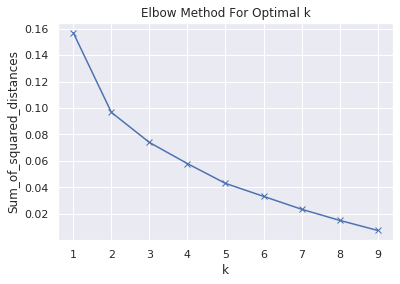

In [85]:
Sum_of_squared_distances = []
n_clusters = 15
kclusters = 15

K = range(1,10)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(df_neighborhoods_berlin_longlat_centre_venues_grouped_clustering)
    Sum_of_squared_distances.append(km.inertia_)
    
plt.plot(K, Sum_of_squared_distances, 'bx-')
plt.xlabel('k')
plt.ylabel('Sum_of_squared_distances')
plt.title('Elbow Method For Optimal k')
plt.show()

In [93]:
#neighborhoods_venues_sorted1 = neighborhoods_venues_sorted.drop(columns=['Cluster Labels'],inplace=True).reset_index()
neighborhoods_venues_sorted1 = neighborhoods_venues_sorted.drop(['Cluster Labels'],axis=1)
neighborhoods_venues_sorted1.head()

,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,...,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Sum Venues GoingOut
0,Alt-Treptow,Café,Nightclub,Bar,Park,Rock Club,Coffee Shop,Ice Cream Shop,Pizza Place,Bakery,...,1,1,1,1,1,3,1,1,1,7
1,Friedrichshain,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,Record Shop,Falafel Restaurant,...,1,0,1,1,2,6,1,0,1,10
2,Hansaviertel,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,Italian Restaurant,Vietnamese Restaurant,...,1,0,0,0,1,4,1,0,0,6
3,Kreuzberg,Coffee Shop,Bar,Café,German Restaurant,Art Gallery,Wine Bar,Pizza Place,Turkish Restaurant,Cocktail Bar,...,1,0,0,0,3,3,1,0,0,7
4,Mitte,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,Concert Hall,Bookstore,...,1,0,0,0,0,1,1,0,0,2


In [94]:
# set number of clusters to 2
kclusters = 2

df_neighborhoods_berlin_longlat_centre_venues_grouped_clustering_k2 = df_neighborhoods_berlin_longlat_centre_venues_grouped.drop('Neighborhoods', 1)

# run k-means clustering
kmeans = KMeans(n_clusters=2, random_state=0).fit(df_neighborhoods_berlin_longlat_centre_venues_grouped_clustering_k2)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

# add clustering labels
neighborhoods_venues_sorted1.insert(0, 'Cluster Labels', kmeans.labels_)

df_neighborhoods_berlin_longlat_centre_venues_merged1 = df_neighborhoods_berlin_longlat_centre

# merge berlin_grouped with berlin_data to add latitude/longitude for each neighborhood
df_neighborhoods_berlin_longlat_centre_venues_merged1 = df_neighborhoods_berlin_longlat_centre_venues_merged1.join(neighborhoods_venues_sorted1.set_index('Neighborhoods'), on='Neighborhood')

df_neighborhoods_berlin_longlat_centre_venues_merged1.head(100) # check the last columns!


,Boroughs,Neighborhood,City,Country,latitude,longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,...,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Sum Venues GoingOut
0,Mitte,Mitte,Berlin,Germany,52.517690,13.402376,1,Hotel,History Museum,Coffee Shop,...,1,0,0,0,0,1,1,0,0,2
1,Mitte,Moabit,Berlin,Germany,52.530102,13.342542,0,Café,Bar,Vietnamese Restaurant,...,1,0,0,0,2,5,1,0,0,8
2,Mitte,Hansaviertel,Berlin,Germany,52.519123,13.341872,1,Zoo Exhibit,Hotel,Art Museum,...,1,0,0,0,1,4,1,0,0,6
3,Mitte,Tiergarten,Berlin,Germany,52.509778,13.357260,1,Hotel,Art Gallery,Art Museum,...,1,0,0,0,3,3,1,0,0,7
6,Friedrichshain-Kreuzberg,Friedrichshain,Berlin,Germany,52.512215,13.450290,0,Café,Vegetarian / Vegan Restaurant,Coffee Shop,...,1,0,1,1,2,6,1,0,1,10
7,Friedrichshain-Kreuzberg,Kreuzberg,Berlin,Germany,52.497644,13.411914,0,Coffee Shop,Bar,Café,...,1,0,0,0,3,3,1,0,0,7
8,Pankow,Prenzlauer Berg,Berlin,Germany,52.539847,13.428565,0,Café,Vietnamese Restaurant,Cocktail Bar,...,1,0,0,0,3,6,1,0,0,10
44,Tempelhof-Schöneberg,Schöneberg,Berlin,Germany,52.482157,13.355190,0,Café,Pizza Place,Bakery,...,1,0,0,0,1,5,1,0,0,7
50,Neukölln,Neukölln,Berlin,Germany,52.481150,13.435350,0,Bar,Coffee Shop,Café,...,1,0,0,0,4,3,1,0,0,8
55,Treptow-Köpenick,Alt-Treptow,Berlin,Germany,52.492563,13.459874,0,Café,Nightclub,Bar,...,1,1,1,1,1,3,1,1,1,7


In [95]:
# create map for k=2 Cluster
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_neighborhoods_berlin_longlat_centre_venues_merged1['latitude'], df_neighborhoods_berlin_longlat_centre_venues_merged1['longitude'], df_neighborhoods_berlin_longlat_centre_venues_merged1['Neighborhood'], df_neighborhoods_berlin_longlat_centre_venues_merged1['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

<img src="https://github.com/nilbob/capstone_project/blob/master/k2_map_zoomin.png?raw=true" width=1000>

In [98]:
new_df1 = df_neighborhoods_berlin_longlat_centre_venues_merged1.set_index('Cluster Labels')
#df_neighborhoods_berlin_longlat_centre_venues_merged.groupby('Cluster Labels').mean()
new_df1.drop(columns=['Venue', 'latitude','longitude','Venue Category','Neighborhood Latitude','Neighborhood Longitude'],inplace=True)
new_df1.drop_duplicates(keep="first")

,Boroughs,Neighborhood,City,Country,latitude,longitude,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,...,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Sum Venues GoingOut
Cluster Labels,,,,,,,,,,,,,,,,,,,,,
1,Mitte,Mitte,Berlin,Germany,52.517690,13.402376,Hotel,History Museum,Coffee Shop,Café,...,1,0,0,0,0,1,1,0,0,2
0,Mitte,Moabit,Berlin,Germany,52.530102,13.342542,Café,Bar,Vietnamese Restaurant,Turkish Restaurant,...,1,0,0,0,2,5,1,0,0,8
1,Mitte,Hansaviertel,Berlin,Germany,52.519123,13.341872,Zoo Exhibit,Hotel,Art Museum,Café,...,1,0,0,0,1,4,1,0,0,6
1,Mitte,Tiergarten,Berlin,Germany,52.509778,13.357260,Hotel,Art Gallery,Art Museum,Concert Hall,...,1,0,0,0,3,3,1,0,0,7
0,Friedrichshain-Kreuzberg,Friedrichshain,Berlin,Germany,52.512215,13.450290,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,...,1,0,1,1,2,6,1,0,1,10


In [100]:
neighborhoods_venues_sorted1['Sum Venues GoingOut'] = neighborhoods_venues_sorted1[['Neighborhoods','Venues_Con_Bar','Venues_Con_Restaurant','Venues_Con_Cafe','Venues_Con_Pub','Venues_Con_Nightclub']].sum(axis=1)
neighborhoods_venues_sorted1[['Neighborhoods','Venues_Con_Bar','Venues_Con_Restaurant','Venues_Con_Cafe','Venues_Con_Pub','Venues_Con_Nightclub','Venues_Vegan_Rest','Sum Venues GoingOut']]

,Neighborhoods,Venues_Con_Bar,Venues_Con_Restaurant,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Sum Venues GoingOut
0,Alt-Treptow,1.0,3,1,1,1,1,7.0
1,Friedrichshain,2.0,6,1,0,1,1,10.0
2,Hansaviertel,1.0,4,1,0,0,0,6.0
3,Kreuzberg,3.0,3,1,0,0,0,7.0
4,Mitte,0.0,1,1,0,0,0,2.0
5,Moabit,2.0,5,1,0,0,0,8.0
6,Neukölln,4.0,3,1,0,0,0,8.0
7,Prenzlauer Berg,3.0,6,1,0,0,0,10.0
8,Schöneberg,1.0,5,1,0,0,0,7.0
9,Tiergarten,3.0,3,1,0,0,0,7.0


In [ ]:
new_df1 = df_neighborhoods_berlin_longlat_centre_venues_merged1.set_index('Cluster Labels')
#df_neighborhoods_berlin_longlat_centre_venues_merged.groupby('Cluster Labels').mean()
new_df1.drop(columns=['latitude','longitude','Boroughs'],inplace=True)
new_df1.drop_duplicates(keep="first")


newnewnew = new_df1.drop(['Neighborhood'], axis=1).reset_index()
newnewnew[['Cluster Labels','Sum Venues GoingOut','Venues_Con_Restaurant','Venues_Vegan_Rest']].groupby('Cluster Labels').count()

<img src="https://github.com/nilbob/capstone_project/blob/master/k2_table.png?raw=true" width=600>

<h3>Findings k=2</h3>

Cluster 0: High amount of GoingOut Venues (high number of Restaurants as well as Cafe, Bar, Nightclub and Vegan Restaurants among the top15 venues)<br>
Cluster 1: Fair amount of GoingOut Venues (incl. restaurants but zero Vegan restaurants among the top15 venues)<br><br>
Our choice would be Cluster 1 again.


In [102]:
newnewnew.head()

,Cluster Labels,City,Country,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,...,Venues_Con_Cafe,Venues_Con_Pub,Venues_Con_Nightclub,Venues_Vegan_Rest,Venues_Bar,Venues_Restaurant,Venues_Cafe,Venues_Pub,Venues_Nightclub,Sum Venues GoingOut
0,1,Berlin,Germany,Hotel,History Museum,Coffee Shop,Café,Plaza,Art Gallery,Museum,...,1,0,0,0,0,1,1,0,0,2
1,0,Berlin,Germany,Café,Bar,Vietnamese Restaurant,Turkish Restaurant,Italian Restaurant,Hotel,Cocktail Bar,...,1,0,0,0,2,5,1,0,0,8
2,1,Berlin,Germany,Zoo Exhibit,Hotel,Art Museum,Café,Beer Garden,Park,Coffee Shop,...,1,0,0,0,1,4,1,0,0,6
3,1,Berlin,Germany,Hotel,Art Gallery,Art Museum,Concert Hall,Italian Restaurant,Zoo Exhibit,Hotel Bar,...,1,0,0,0,3,3,1,0,0,7
4,0,Berlin,Germany,Café,Vegetarian / Vegan Restaurant,Coffee Shop,Nightclub,Ice Cream Shop,Bar,Thai Restaurant,...,1,0,1,1,2,6,1,0,1,10


##  Results <a name="results"></a> 

After checking the numbers of clusters of k=2 and k=3, I found it easier to choose from k=2, when it comes to where to locate the vegan lifestyle centre, because the choices with no vegan restaurants within the cluster 1 for the top15 common venues and less restaurants, means that there is lower competition for us and that is what we were looking for in the first place.
When using k=3, the choice is less obvious but still Cluster 1 would be probably the best fit out of the three since the amount of restaurants is lowest, there is no vegan restaurant and the amount of GoingOut venues is lowest in the cluster too. By comparing the two maps (k=2 vs k=3), one can see that Cluster 2 (k=3) falls into Cluster 1 of k=2. That means that when we reduce the cluster by one, all the values from that cluster would fall into the Cluster 1, the one that we wouldn't choose to set up our business. This in turn means that having set k=3 does not give us an extra value or business opportunity and the extra cluster is redundant<br>
Looking at the map, one can see that Cluster 1 for k=2 and k=3, is right in the centre of Berlin with all the tourist hotspots and main attraction. Prices for renting out a place to run a business there, might be very high and not optimum. That could also be the reason why there are only exist a few places to eat and drink. This brings us right to the conclusion and discussion section.

##  Conclusion/Discussion/Outlook <a name="conclusion"></a> 

<b>Conclusion</b><br>
Given the data from Wikipedia and the Foursquare API, we could use the unsupervised clustering algorithm k-means to determine the best spot to set up our vegan lifestyle centre business. For k=2 and k=3, the cluster 1 (very centrally located around the borough Berlin Mitte) would be the best fit. While k=3 did not result in an obvious choice, running the elbow method, brought us to the conclusion that the values from the extra cluster fall into the cluster that we wouldn't choose. This means that k=2 was more helpful in figuring out that cluster 1 would be our best fit, since it lead us to a more obvious result to base our decision on.

<b>Discussions on:</b><br>
The Business Problem:<br>
- We know that the Business model does not only depend on the location (based on clustering), but it has an impact on it. Information, such as rental prices for the cluster as well as the amount of vegan restaurants, which are already there, but not among the most common one, or the activities vegan people prefer, are also relevant and might play a huge roll in setting up the business there or not. This holds also true for yoga studios and hotels nearby. 

Data:
Based on the data from the API, the following questions arise: 
- how good is the quality of it? how much emphasize can be given on the most common venues in terms of who uses the Swarm, former Foursquare App? Does our target group use the App, are they over represented or under represented in the App. How important are the not so common venues? 
- How good is the data on new restaurants? Will they appear instantly? Are new places over or underrated?
- How accurate is the data from Foursquare? One should check the app with the actual venues in a particular area of interest. 
- How well did I chose the radius? Is it too big or too small? What impact does it have on our data and cluster?
- How well chosen were the neighborhoods? Do we need more or even less neighborhoods to look at? The k-means algorithm works best with fairly big data. Therefore, it might be useful to feed the algorithms with more neighborhoods. 
- Is there other data available to base our decision on (sources for well-being, income, rental prices, population, socio demographic data)?
- Should we pay more attention to other aspects like accomodations and yoga studios?
- Are all restaurants are competitors? Maybe, it's good to have some restaurants nearby, because not everyone might be interested in the restaurant, but also in other aspects of the centre (animal free butchery, yoga studio, clothing shop, etc.)

A more general question that arises:
- Are 80.000 vegan living people, tourists and people, who are interested, enough?

<b>Outlook</b>:<br>

Clustering Algorithm:<br>
- We know that the algorithm's outcome also depends on the distance measurement used, eg. using a different measurement from Euclidien Distance like the Manhattan Distance might lead to another clustering that impacts our business decision. Why not investigate it by trying it out? Maybe, this will change where the values from one cluster would fall into another one if we reduce k by 1.
- We should also use an alternative measurement like the silhouette method to find if the optimum is still k=2. 
Outlook:<br>
- Furthermore, we should compare neighborhoods in other cities for example New York, Moscow, London or Tokyo with our data. This will be very interesting when opening or starting a vegan lifestyle centre chain to let our business grow worldwide once set up successfully locally.
